# Workplace Attendance dataset creation

📌 Due to the confidentiality of HR data, it is already quite difficult to find HR datasets. It is even more complicated with HR time-series-based dataset...

             ➡️ So, I decided to create my own! 

🕵🏻 I imagined that traffic data (road/transport) could be a good approximation to workplace attendance data. 

💡 After a few searchs, I found the "permanent road counts" dataset provided by OpenData PARIS under ODbL License. 

🇫🇷 On the Parisian network, traffic measurement is mainly carried out through electromagnetic loops implanted in the road. These data provide an overview of the traffic flow 🚕 over 3,000 road sections every hour every day. The dataset is only available for the last 13 rolling months. Historical data can be retrieved here.

Link: Open Data Paris - Comptages routiers permanents:

https://opendata.paris.fr/explore/dataset/comptages-routiers-permanents/information/?disjunctive.libelle&disjunctive.etat_trafic&disjunctive.libelle_nd_amont&disjunctive.libelle_nd_aval

Link: Open Data Paris - Comptages routiers permanents HISTORIQUE:

https://parisdata.opendatasoft.com/explore/dataset/comptages-routiers-permanents-historique/information/

## Import libraries

In [144]:
import numpy as np             
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams["figure.figsize"] = (16,6)
plotsize = (13, 5)

import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## Pull data

In [145]:
df = pd.read_csv('comptages-routiers-permanents-4septRichelieu-2021-2023.csv', sep = ';')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Identifiant arc            9690 non-null   int64  
 1   Libelle                    9690 non-null   object 
 2   Date et heure de comptage  9690 non-null   object 
 3   Débit horaire              9559 non-null   float64
 4   Taux d'occupation          9559 non-null   float64
 5   Etat trafic                9690 non-null   object 
 6   Identifiant noeud amont    9690 non-null   int64  
 7   Libelle noeud amont        9690 non-null   object 
 8   Identifiant noeud aval     9690 non-null   int64  
 9   Libelle noeud aval         9690 non-null   object 
 10  Etat arc                   9690 non-null   object 
 11  Date debut dispo data      9690 non-null   object 
 12  Date fin dispo data        9690 non-null   object 
 13  geo_point_2d               9690 non-null   objec

In [147]:
df.head()

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
0,1978,4_Septembre,2022-01-01T08:00:00+01:00,97.0,1.40111,Fluide,2149,4_Septembre-Richelieu,2150,4_Septembre-Bourse-Vivienne,Invalide,2005-01-01,2019-06-01,"48.86903471272503, 2.339319464229476","{""coordinates"": [[2.3386088501, 48.8691745996]..."
1,1978,4_Septembre,2022-01-01T14:00:00+01:00,355.0,4.70723,Fluide,2149,4_Septembre-Richelieu,2150,4_Septembre-Bourse-Vivienne,Invalide,2005-01-01,2019-06-01,"48.86903471272503, 2.339319464229476","{""coordinates"": [[2.3386088501, 48.8691745996]..."
2,1978,4_Septembre,2022-01-01T18:00:00+01:00,510.0,7.64500,Fluide,2149,4_Septembre-Richelieu,2150,4_Septembre-Bourse-Vivienne,Invalide,2005-01-01,2019-06-01,"48.86903471272503, 2.339319464229476","{""coordinates"": [[2.3386088501, 48.8691745996]..."
3,1978,4_Septembre,2022-01-01T10:00:00+01:00,90.0,1.23611,Fluide,2149,4_Septembre-Richelieu,2150,4_Septembre-Bourse-Vivienne,Invalide,2005-01-01,2019-06-01,"48.86903471272503, 2.339319464229476","{""coordinates"": [[2.3386088501, 48.8691745996]..."
4,1978,4_Septembre,2022-01-01T12:00:00+01:00,217.0,3.02445,Fluide,2149,4_Septembre-Richelieu,2150,4_Septembre-Bourse-Vivienne,Invalide,2005-01-01,2019-06-01,"48.86903471272503, 2.339319464229476","{""coordinates"": [[2.3386088501, 48.8691745996]..."


## Build dataset

### Features selection

In [148]:
# Delete all columns except those 2
df = df.loc[:, ['Date et heure de comptage','Débit horaire']]

In [149]:
df.rename({'Débit horaire': 'WPAtt'}, axis=1, inplace=True)

In [150]:
#Add date column from another column extraction
df['Date'] = df['Date et heure de comptage'].str[:10]

In [151]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [152]:
df.head()

,Date et heure de comptage,WPAtt,Date
0,2022-01-01T08:00:00+01:00,97.0,2022-01-01
1,2022-01-01T14:00:00+01:00,355.0,2022-01-01
2,2022-01-01T18:00:00+01:00,510.0,2022-01-01
3,2022-01-01T10:00:00+01:00,90.0,2022-01-01
4,2022-01-01T12:00:00+01:00,217.0,2022-01-01


In [153]:
df['Hour'] = df['Date et heure de comptage'].str[11:13]

In [154]:
df = df.iloc[: , 1:]

In [155]:
df.head()

,WPAtt,Date,Hour
0,97.0,2022-01-01,08
1,355.0,2022-01-01,14
2,510.0,2022-01-01,18
3,90.0,2022-01-01,10
4,217.0,2022-01-01,12


### Data selection

In [156]:
# List unique values for categorical columns
for col in df.select_dtypes('object'):
    print(f'{col:-<30} {df[col].unique()}')

Hour-------------------------- ['08' '14' '18' '10' '12' '16' '17' '15' '04' '00' '22' '20' '13' '05'
 '01' '19' '11' '06' '23' '21' '07' '09' '03' '02']


In [157]:
# Group analysis
df.groupby(['Hour']).mean()

,WPAtt
Hour,
00,448.502500
01,375.406015
02,301.654912
03,231.957071
04,154.854637
05,116.557500
06,116.580000
07,167.885000
08,275.280000


In [158]:
# Remove rows where hour is not equal to 09
df = df[df["Hour"] == "09"]

In [159]:
df.shape

(404, 3)

In [160]:
df = df.drop(columns=["Hour"])

In [161]:
df.head()

,WPAtt,Date
53,75.0,2022-01-01
63,450.0,2022-11-08
106,518.0,2022-10-07
132,630.0,2021-12-15
161,598.0,2022-12-06


In [162]:
# Sort DataFrame by date column
df.sort_values(by='Date', inplace = True)

In [163]:
pd.set_option('display.max_rows', None)

In [164]:
df

,WPAtt,Date
3885,579.0,2021-12-01
3642,504.0,2021-12-02
1249,601.0,2021-12-03
4077,254.0,2021-12-04
2343,144.0,2021-12-05
2669,625.0,2021-12-06
1683,588.0,2021-12-07
682,639.0,2021-12-08
481,631.0,2021-12-09
8446,581.0,2021-12-10


### Manage missing values

In [165]:
# Fill in missing dates with 0
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date').asfreq('D').reset_index()

In [166]:
print(df.loc[df.index[94]])

Date     2022-03-05 00:00:00
WPAtt                    NaN
Name: 94, dtype: object


In [167]:
# Set date as index
df.set_index('Date', inplace=True)

In [168]:
df

,WPAtt
Date,
2021-12-01,579.0
2021-12-02,504.0
2021-12-03,601.0
2021-12-04,254.0
2021-12-05,144.0
2021-12-06,625.0
2021-12-07,588.0
2021-12-08,639.0
2021-12-09,631.0


In [169]:
# Sort by date in index
df = df.sort_index()

In [170]:
df.head()

,WPAtt
Date,
2021-12-01,579.0
2021-12-02,504.0
2021-12-03,601.0
2021-12-04,254.0
2021-12-05,144.0


In [171]:
#df = df.resample('1D').mean().ffill()

In [172]:
# Fill with value from last 7 days 
df = df.fillna(df.shift(7))

In [173]:
# Fill with value from last 7 days, on more time 
df = df.fillna(df.shift(7))

In [174]:
df

,WPAtt
Date,
2021-12-01,579.0
2021-12-02,504.0
2021-12-03,601.0
2021-12-04,254.0
2021-12-05,144.0
2021-12-06,625.0
2021-12-07,588.0
2021-12-08,639.0
2021-12-09,631.0


<AxesSubplot:title={'center':'Workplace attendance over time'}, xlabel='Date'>

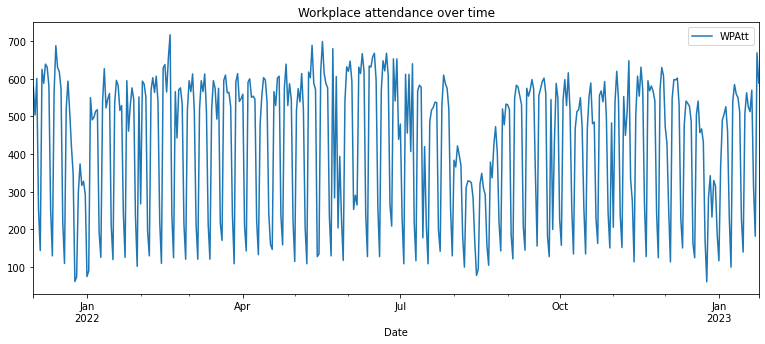

In [175]:
df.plot(figsize=plotsize, title='Workplace attendance over time')

### Correct outliers

In [176]:
df_outliers = df[df.WPAtt <= 300]
df_outliers = df_outliers[df_outliers.index.weekday <= 4] 
df_outliers.shape

(15, 1)

In [177]:
df_outliers

,WPAtt
Date,
2021-12-27,298.0
2021-12-31,292.0
2022-02-01,268.0
2022-04-18,147.0
2022-05-24,284.0
2022-05-26,204.0
2022-06-06,265.0
2022-07-14,178.0
2022-08-12,284.0


In [178]:
# There are 3 outliers which are not public holidays or during vacation periods
df.loc["2022-02-01"] = df.loc["2022-01-25"] #value last week, same day
df.loc["2022-05-24"] = df.loc["2022-05-17"] #value last week, same day
df.loc["2022-09-27"] = df.loc["2022-09-20"] #value last week, same day

### Visualize vacation periods

In [179]:
#df['WE'] = df.weekday > 4

In [180]:
# Children vacations
# Christmas 2021: 18/12/2021 02/01/2022
# Winter: 19/02/2022 06/03/2022
# Easter: 23/04/2022 09/05/2022
# Summer: 07/07/2022 31/08/2022
# Fall: 22/10/2022 06/11/2022
# Christmas: 2022: 17/12/2022 02/01/2023

<AxesSubplot:title={'center':'Christmas 2022'}, xlabel='Date'>

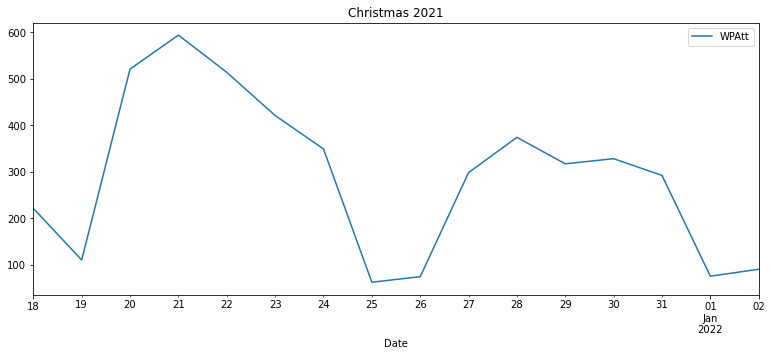

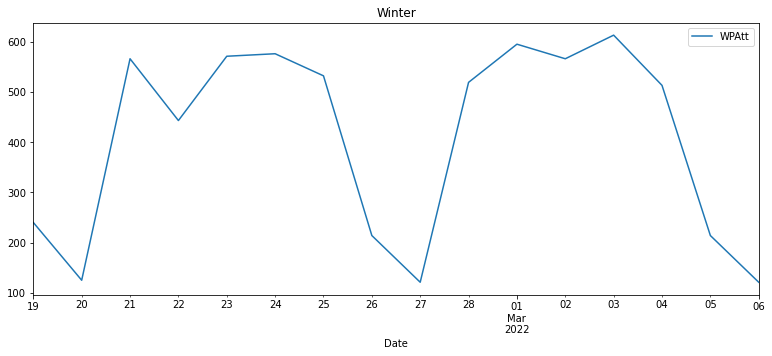

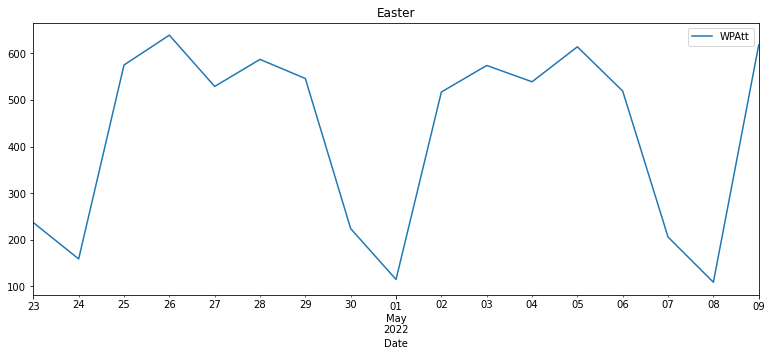

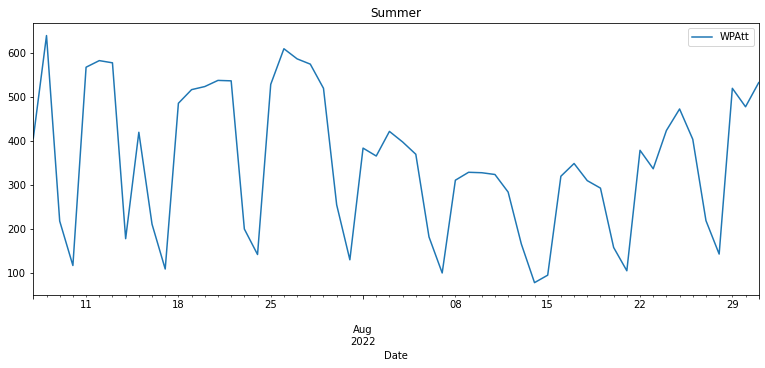

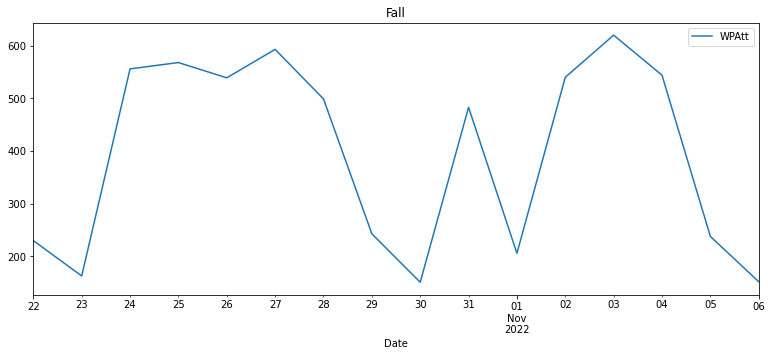

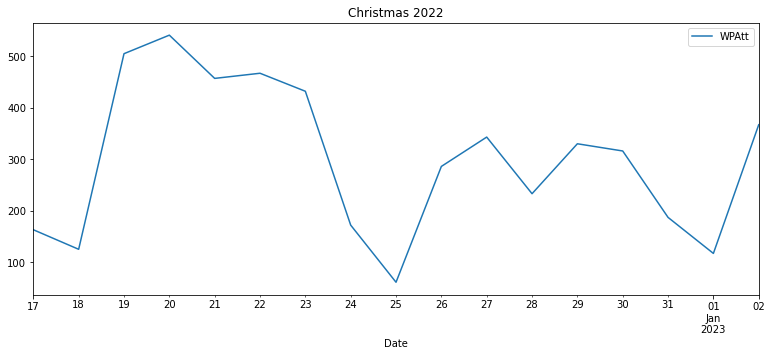

In [181]:
df.loc["2021-12-18":"2022-01-02"].plot(figsize=plotsize, title='Christmas 2021')
df.loc["2022-02-19":"2022-03-06"].plot(figsize=plotsize, title='Winter')
df.loc["2022-04-23":"2022-05-09"].plot(figsize=plotsize, title='Easter')
df.loc["2022-07-07":"2022-08-31"].plot(figsize=plotsize, title='Summer')
df.loc["2022-10-22":"2022-11-06"].plot(figsize=plotsize, title='Fall')
df.loc["2022-12-17":"2023-01-02"].plot(figsize=plotsize, title='Christmas 2022')

<AxesSubplot:title={'center':'Workplace attendance over time'}, xlabel='Date'>

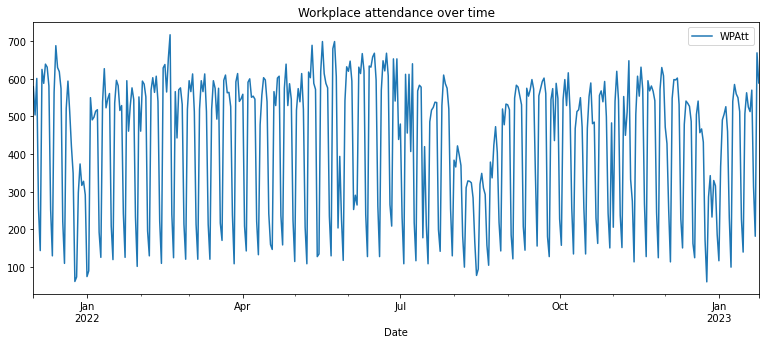

In [182]:
df.plot(figsize=plotsize, title='Workplace attendance over time')

### Apply additional ratio during vacation periods

In [183]:
# Christmas 2021
df.loc["2021-12-11":"2021-12-17"] = round(df.loc["2021-12-11":"2021-12-17"] * 0.9,0)
df.loc["2021-12-18":"2022-01-02"] = round(df.loc["2021-12-18":"2022-01-02"] * 0.8,0)
df.loc["2022-01-03":"2022-01-09"] = round(df.loc["2022-01-03":"2022-01-09"] * 0.9,0)

# Winter
df.loc["2022-02-19":"2022-03-06"] = round(df.loc["2022-02-19":"2022-03-06"] * 0.9,0)

# Easter
df.loc["2022-04-23":"2022-05-09"] = round(df.loc["2022-04-23":"2022-05-09"] * 0.9,0)

# Summer
# df.loc["2022-07-07":"2022-08-31"] = round(df.loc["2022-07-07":"2022-08-31"],0) 

# Fall
df.loc["2022-10-22":"2022-11-06"] = round(df.loc["2022-10-22":"2022-11-06"] * 0.9,0)

# Christmas 2022
df.loc["2022-12-10":"2022-12-16"] = round(df.loc["2022-12-10":"2022-12-16"] * 0.9,0)
df.loc["2022-12-17":"2023-01-02"] = round(df.loc["2022-12-17":"2023-01-02"] * 0.8,0)
df.loc["2023-01-03":"2023-01-09"] = round(df.loc["2023-01-03":"2023-01-09"] * 0.9,0)

<AxesSubplot:title={'center':'Workplace attendance over time'}, xlabel='Date'>

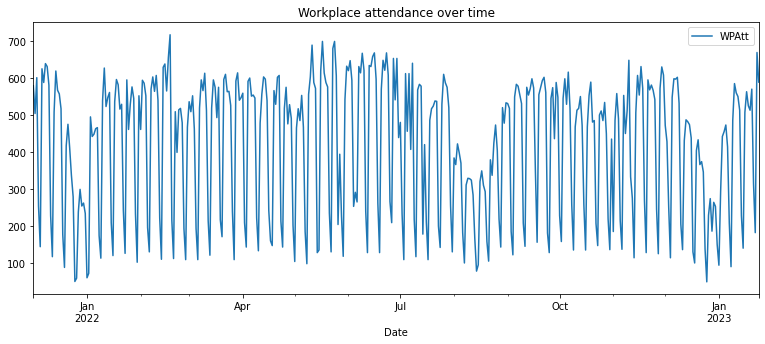

In [184]:
df.plot(figsize=plotsize, title='Workplace attendance over time')

### Apply additional ratio on week-end days

In [185]:
df_sunday = df[df.index.weekday==6]
df_sunday.shape

(60, 1)

<AxesSubplot:title={'center':'Workplace attendance over time'}, xlabel='Date'>

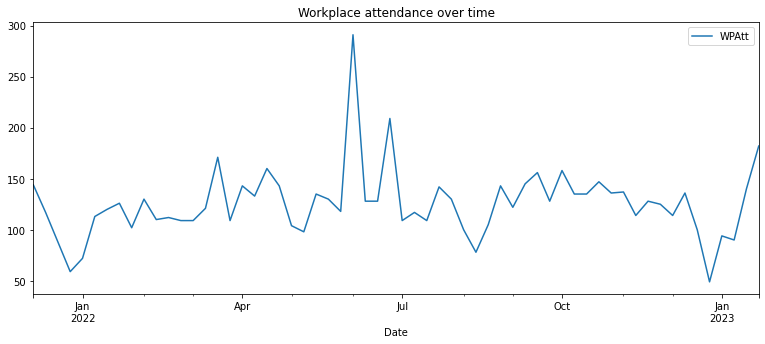

In [186]:
df_sunday.plot(figsize=plotsize, title='Workplace attendance over time')

In [187]:
# Set saturday and sunday: divide current number by 10
df[df.index.weekday==5] = round(df[df.index.weekday==5] / 10)
df[df.index.weekday==6] = round(df[df.index.weekday==6] / 10)

<AxesSubplot:title={'center':'Workplace attendance over time'}, xlabel='Date'>

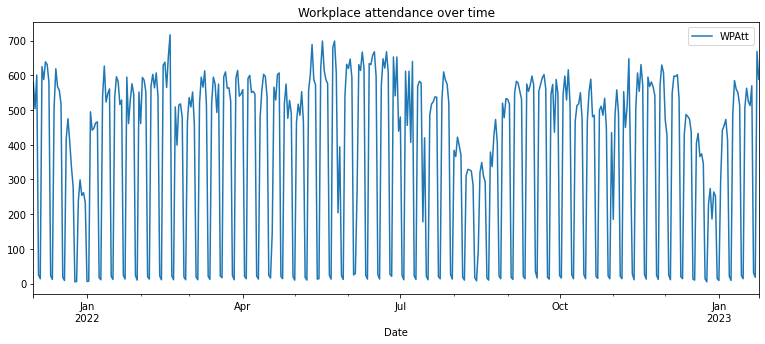

In [188]:
df.plot(figsize=plotsize, title='Workplace attendance over time')

### Apply additional ratio on fridays

In [189]:
df[df.index.weekday==4] = round(df[df.index.weekday==4] * 0.95)

<AxesSubplot:xlabel='Date'>

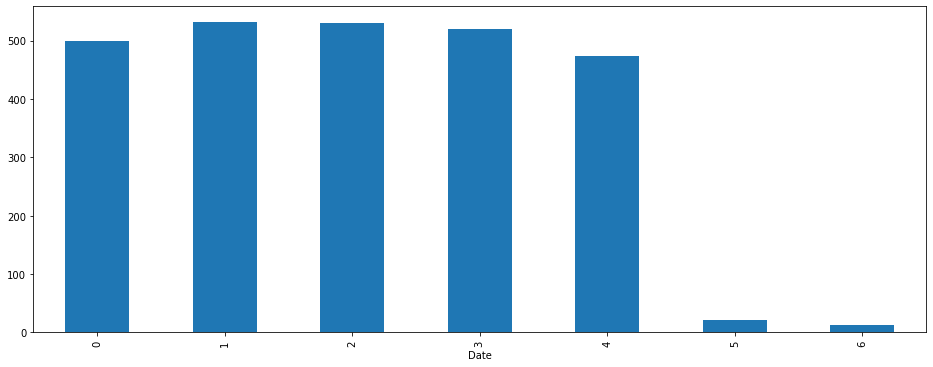

In [190]:
# Display average per weekday
df.groupby(df.index.weekday).mean().plot(kind='bar', legend=None)

In [191]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df

,WPAtt,Year,Month
Date,,,
2021-12-01,579.0,2021,12
2021-12-02,504.0,2021,12
2021-12-03,571.0,2021,12
2021-12-04,25.0,2021,12
2021-12-05,14.0,2021,12
2021-12-06,625.0,2021,12
2021-12-07,588.0,2021,12
2021-12-08,639.0,2021,12
2021-12-09,631.0,2021,12


### Introduction of a monthly headcount calculation based on random distributions of newcomers and leavers per month.

In [192]:
#Step 1: starting number of staff
num_staff = [750]

#### Code:
##### Step 1: timeline
timeline = np.arange(0, 14, 1) # 14 months

###### Step 2: hiring and dismissal process
for t in timeline[1:]:

    hire_prob    = np.random.normal(0.05, 0.03)
    dismiss_prob = np.random.normal(0.035, 0.015)
    num_staff.append(num_staff[-1] + int(hire_prob * num_staff[-1]) - int(dismiss_prob * num_staff[-1]))

##### Step 3: Plot time series
plt.plot(timeline, num_staff)
plt.xlabel("Time (months)")
plt.ylabel("Number of Staff")
plt.show()

In [193]:
# Results from one random try
num_staff=[750, 740, 762, 773, 800, 799, 796, 815, 857, 876, 912, 966, 948, 966]
#num_staff=[750, 862, 973, 1001, 1199, 1215, 1316, 1276, 1100, 1066, 948, 866, 780, 750]

### Linear application of monthly ratios to the workplace attendance figures

In [194]:
sn = df
sn['headcount'] = 0
sn

,WPAtt,Year,Month,headcount
Date,,,,
2021-12-01,579.0,2021,12,0
2021-12-02,504.0,2021,12,0
2021-12-03,571.0,2021,12,0
2021-12-04,25.0,2021,12,0
2021-12-05,14.0,2021,12,0
2021-12-06,625.0,2021,12,0
2021-12-07,588.0,2021,12,0
2021-12-08,639.0,2021,12,0
2021-12-09,631.0,2021,12,0


In [195]:
sn = sn.reset_index() 

In [196]:
sn.index

RangeIndex(start=0, stop=420, step=1)

In [197]:
i_y = sn.iloc[0]['Year']
i_m = sn.iloc[0]['Month']
t = 0
i_m

12

In [198]:
print(sn.iloc[0]['Year'], i_y, sn.iloc[0]['Month'], i_m)

2021 2021 12 12


In [199]:
i_m

12

In [200]:
for i in sn.index:
    if (sn.iloc[i]['Year']  == i_y) and (sn.iloc[i]['Month'] == i_m): 
        sn.at[i,'headcount'] = num_staff[t]
    else:
        i_y = sn.iloc[i]['Year']
        i_m = sn.iloc[i]['Month']
        t = t + 1
        sn.at[i,'headcount'] = num_staff[t]

In [201]:
sn

,Date,WPAtt,Year,Month,headcount
0,2021-12-01,579.0,2021,12,750
1,2021-12-02,504.0,2021,12,750
2,2021-12-03,571.0,2021,12,750
3,2021-12-04,25.0,2021,12,750
4,2021-12-05,14.0,2021,12,750
5,2021-12-06,625.0,2021,12,750
6,2021-12-07,588.0,2021,12,750
7,2021-12-08,639.0,2021,12,750
8,2021-12-09,631.0,2021,12,750
9,2021-12-10,552.0,2021,12,750


### Final dataset preparation

In [202]:
# Set date as index
sn.set_index('Date', inplace=True)

In [203]:
sn = sn.drop(columns=["Year"])
sn = sn.drop(columns=["Month"])

In [204]:
sn

,WPAtt,headcount
Date,,
2021-12-01,579.0,750
2021-12-02,504.0,750
2021-12-03,571.0,750
2021-12-04,25.0,750
2021-12-05,14.0,750
2021-12-06,625.0,750
2021-12-07,588.0,750
2021-12-08,639.0,750
2021-12-09,631.0,750


<AxesSubplot:title={'center':'Number over time'}, xlabel='Date'>

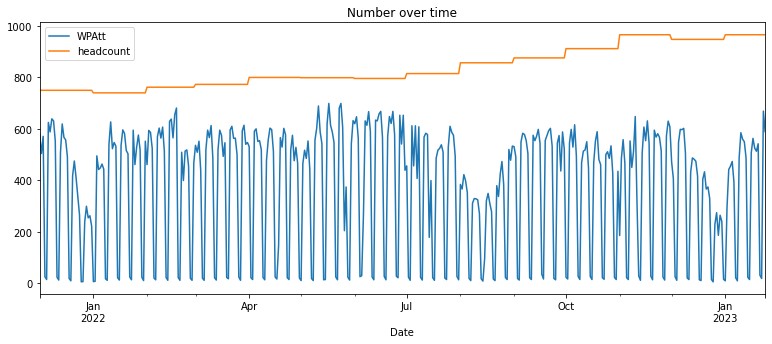

In [205]:
sn.plot(figsize=plotsize, title='Number over time')

In [206]:
sn['headcount0']= num_staff[0]
sn['ratio_hc0']= sn['headcount'] / sn['headcount0']
sn['WPAtt2']= round(sn['WPAtt'] * sn['ratio_hc0'],0)

In [207]:
sn

,WPAtt,headcount,headcount0,ratio_hc0,WPAtt2
Date,,,,,
2021-12-01,579.0,750,750,1.000000,579.0
2021-12-02,504.0,750,750,1.000000,504.0
2021-12-03,571.0,750,750,1.000000,571.0
2021-12-04,25.0,750,750,1.000000,25.0
2021-12-05,14.0,750,750,1.000000,14.0
2021-12-06,625.0,750,750,1.000000,625.0
2021-12-07,588.0,750,750,1.000000,588.0
2021-12-08,639.0,750,750,1.000000,639.0
2021-12-09,631.0,750,750,1.000000,631.0


<AxesSubplot:title={'center':'Over time'}, xlabel='Date'>

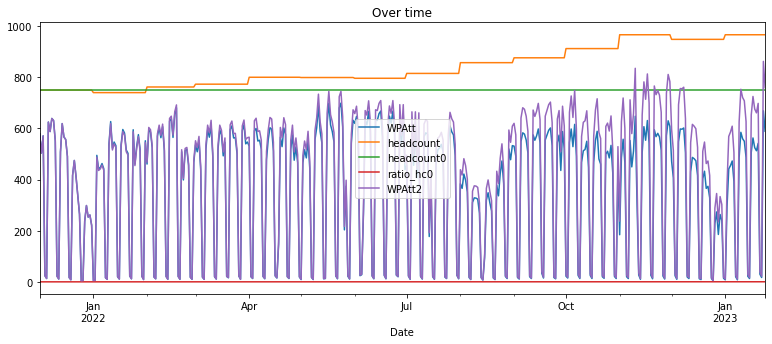

In [208]:
sn.plot(figsize=plotsize, title='Over time')

In [209]:
sn['WPAtt']= sn['WPAtt2']

In [210]:
# Delete all columns except those 2
sn = sn.loc[:, ['WPAtt','headcount']]

In [211]:
sn

,WPAtt,headcount
Date,,
2021-12-01,579.0,750
2021-12-02,504.0,750
2021-12-03,571.0,750
2021-12-04,25.0,750
2021-12-05,14.0,750
2021-12-06,625.0,750
2021-12-07,588.0,750
2021-12-08,639.0,750
2021-12-09,631.0,750


In [212]:
sn.to_csv('WorkplaceAttendanceDec21-Jan23.csv', encoding='utf-8')